In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
mortality_data = pd.read_csv('../data/mortality_data.csv')
mortality_data

,Calendar Year,Park Name,Cause of Death,Injury Category,Sex,Age Range,Outcome
0,2007,Glen Canyon National Recreation Area,Undetermined,Undetermined,Male,65+,Fatal Injury
1,2007,Golden Gate National Recreation Area,Drowning,Unintentional,Male,Undetermined,Fatal Injury
2,2007,Golden Gate National Recreation Area,Undetermined,Undetermined,Male,Undetermined,Fatal Injury
3,2007,Natchez Trace Parkway,Motor Vehicle Crash,Unintentional,Female,45-54,Fatal Injury
4,2007,Natchez Trace Parkway,Motor Vehicle Crash,Unintentional,Female,15-24,Fatal Injury
...,...,...,...,...,...,...,...
3201,2021,Curecanti National Recreation Area,Motor Vehicle Crash,Unintentional,Undetermined,Undetermined,Fatal injury
3202,2021,Lake Mead National Recreation Area,Undetermined,Undetermined,Male,Undetermined,Fatal injury
3203,2021,Glen Canyon National Recreation Area,Undetermined,Undetermined,Male,55-64,Fatal injury
3204,2021,Suitland,Motor Vehicle Crash,Unintentional,Undetermined,Undetermined,Fatal injury


In [3]:
mortality_data.head(20)

,Calendar Year,Park Name,Cause of Death,Injury Category,Sex,Age Range,Outcome
0,2007,Glen Canyon National Recreation Area,Undetermined,Undetermined,Male,65+,Fatal Injury
1,2007,Golden Gate National Recreation Area,Drowning,Unintentional,Male,Undetermined,Fatal Injury
2,2007,Golden Gate National Recreation Area,Undetermined,Undetermined,Male,Undetermined,Fatal Injury
3,2007,Natchez Trace Parkway,Motor Vehicle Crash,Unintentional,Female,45-54,Fatal Injury
4,2007,Natchez Trace Parkway,Motor Vehicle Crash,Unintentional,Female,15-24,Fatal Injury
5,2007,Gateway National Recreation Area,Undetermined,Undetermined,Male,Undetermined,Fatal Injury
6,2007,Black Canyon Of The Gunnison National Park,Fall,Unintentional,Female,15-24,Fatal Injury
7,2007,Big South Fork National River and Recreation Area,Drowning,Unintentional,Male,25-34,Fatal Injury
8,2007,Mount Rainier National Park,Environmental,Unintentional,Male,45-54,Fatal Injury
9,2007,Biscayne National Park,"Transportation\n(e.g. bicycle, boat)",Unintentional,Male,25-34,Fatal Injury


In [4]:
mortality_data.shape

(3206, 7)

In [5]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3206 entries, 0 to 3205
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Calendar Year    3206 non-null   int64 
 1   Park Name        3206 non-null   object
 2   Cause of Death   3206 non-null   object
 3   Injury Category  3206 non-null   object
 4   Sex              3206 non-null   object
 5   Age Range        3206 non-null   object
 6   Outcome          3206 non-null   object
dtypes: int64(1), object(6)
memory usage: 175.5+ KB


In [6]:
mortality_data.dtypes

Calendar Year       int64
Park Name          object
Cause of Death     object
Injury Category    object
Sex                object
Age Range          object
Outcome            object
dtype: object

In [7]:
mortality_data['Cause of Death'].value_counts()

Drowning                                786
Motor Vehicle Crash                     633
Undetermined                            564
Medical Death                           402
Fall                                    394
Environmental                           186
Transportation\n(e.g. bicycle, boat)    123
Other                                    46
Poisoning                                33
Homicide                                 27
Wildlife/Animal                          10
Legal Intervention                        2
Name: Cause of Death, dtype: int64

In [8]:
mortality_data['Age Range'].value_counts()

Undetermined    710
65+             488
55-64           438
15-24           398
45-54           395
25-34           364
35-44           313
0-14            100
Name: Age Range, dtype: int64

### Keeping only rows with the title 'National Park'

In [9]:
for index, row in mortality_data.iterrows():  #dropping everything that is not a National Park 
    if row['Park Name'].find('National Park') == -1:
        mortality_data.drop(index, inplace = True)    

In [10]:
mortality_data = mortality_data.reset_index(drop = True)
mortality_data

,Calendar Year,Park Name,Cause of Death,Injury Category,Sex,Age Range,Outcome
0,2007,Black Canyon Of The Gunnison National Park,Fall,Unintentional,Female,15-24,Fatal Injury
1,2007,Mount Rainier National Park,Environmental,Unintentional,Male,45-54,Fatal Injury
2,2007,Biscayne National Park,"Transportation\n(e.g. bicycle, boat)",Unintentional,Male,25-34,Fatal Injury
3,2007,Mount Rainier National Park,Drowning,Unintentional,Female,45-54,Fatal Injury
4,2007,Mount Rainier National Park,Drowning,Unintentional,Male,35-44,Fatal Injury
...,...,...,...,...,...,...,...
1366,2021,Mount Rainier National Park,Fall,Unintentional,Male,Undetermined,Fatal injury
1367,2021,Great Smoky Mountains National Park,Medical Death,Medical,Male,Undetermined,Fatal injury
1368,2021,Grand Canyon National Park,Undetermined,Undetermined,Male,Undetermined,Fatal injury
1369,2021,Pinnacles National Park,Fall,Unintentional,Male,65+,Fatal injury


In [11]:
mortality_data['Park Name'].value_counts()

Grand Canyon National Park                         149
Yosemite National Park                             146
Great Smoky Mountains National Park                113
Sequoia & Kings Canyon National Parks               86
Mount Rainier National Park                         68
Denali National Park & Preserve                     63
Yellowstone National Park                           63
Grand Teton National Park                           60
Zion National Park                                  52
Glacier National Park                               46
Death Valley National Park                          46
Rocky Mountain National Park                        46
Olympic National Park                               32
Virgin Islands National Park                        28
Shenandoah National Park                            27
Joshua Tree National Park                           26
Big Bend National Park                              25
Indiana Dunes National Park                         25
North Casc

In [12]:
mortality_data = mortality_data[mortality_data['Park Name'].str.contains('Wolf Trap')==False]
mortality_data   # getting rid of the Wolf Trap theater

,Calendar Year,Park Name,Cause of Death,Injury Category,Sex,Age Range,Outcome
0,2007,Black Canyon Of The Gunnison National Park,Fall,Unintentional,Female,15-24,Fatal Injury
1,2007,Mount Rainier National Park,Environmental,Unintentional,Male,45-54,Fatal Injury
2,2007,Biscayne National Park,"Transportation\n(e.g. bicycle, boat)",Unintentional,Male,25-34,Fatal Injury
3,2007,Mount Rainier National Park,Drowning,Unintentional,Female,45-54,Fatal Injury
4,2007,Mount Rainier National Park,Drowning,Unintentional,Male,35-44,Fatal Injury
...,...,...,...,...,...,...,...
1366,2021,Mount Rainier National Park,Fall,Unintentional,Male,Undetermined,Fatal injury
1367,2021,Great Smoky Mountains National Park,Medical Death,Medical,Male,Undetermined,Fatal injury
1368,2021,Grand Canyon National Park,Undetermined,Undetermined,Male,Undetermined,Fatal injury
1369,2021,Pinnacles National Park,Fall,Unintentional,Male,65+,Fatal injury


In [13]:
mortality_data['Cause of Death'].value_counts()

Fall                                    325
Medical Death                           221
Undetermined                            211
Motor Vehicle Crash                     182
Drowning                                180
Environmental                           151
Transportation\n(e.g. bicycle, boat)     62
Other                                    12
Poisoning                                11
Wildlife/Animal                           8
Homicide                                  6
Legal Intervention                        1
Name: Cause of Death, dtype: int64

In [14]:
mortality_data['Park Name'].value_counts()

Grand Canyon National Park                     149
Yosemite National Park                         146
Great Smoky Mountains National Park            113
Sequoia & Kings Canyon National Parks           86
Mount Rainier National Park                     68
Denali National Park & Preserve                 63
Yellowstone National Park                       63
Grand Teton National Park                       60
Zion National Park                              52
Glacier National Park                           46
Death Valley National Park                      46
Rocky Mountain National Park                    46
Olympic National Park                           32
Virgin Islands National Park                    28
Shenandoah National Park                        27
Joshua Tree National Park                       26
Big Bend National Park                          25
Indiana Dunes National Park                     25
North Cascades National Park                    20
Acadia National Park           

In [15]:
mortality_data['Outcome'].value_counts()

Fatal injury    863
Fatal Injury    507
Name: Outcome, dtype: int64

### Need to make sure all the park names are correct, capitalization, etc. Tidy it up! 

In [16]:
mortality_data['Cause of Death'] = mortality_data['Cause of Death'].str.replace('\n','')

C:\Users\tsmit\AppData\Local\Temp\ipykernel_11220\2262188976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_data['Cause of Death'] = mortality_data['Cause of Death'].str.replace('\n','')


In [17]:
mortality_data['Cause of Death'].value_counts() #making sure it worked

Fall                                  325
Medical Death                         221
Undetermined                          211
Motor Vehicle Crash                   182
Drowning                              180
Environmental                         151
Transportation(e.g. bicycle, boat)     62
Other                                  12
Poisoning                              11
Wildlife/Animal                         8
Homicide                                6
Legal Intervention                      1
Name: Cause of Death, dtype: int64

In [18]:
mortality_data['Outcome'] = mortality_data['Outcome'].str.replace('I','i')

C:\Users\tsmit\AppData\Local\Temp\ipykernel_11220\3249350783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_data['Outcome'] = mortality_data['Outcome'].str.replace('I','i')


In [19]:
mortality_data['Outcome'].value_counts()

Fatal injury    1370
Name: Outcome, dtype: int64

In [20]:
mortality_data['Park Name'] = (mortality_data['Park Name'].str.replace('Wrangell - St Elias National Park & Reserve', 
                                         'Wrangell-St. Elias National Park & Preserve'))

C:\Users\tsmit\AppData\Local\Temp\ipykernel_11220\228413495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_data['Park Name'] = (mortality_data['Park Name'].str.replace('Wrangell - St Elias National Park & Reserve',


In [21]:
mortality_data['Park Name'].value_counts()

Grand Canyon National Park                     149
Yosemite National Park                         146
Great Smoky Mountains National Park            113
Sequoia & Kings Canyon National Parks           86
Mount Rainier National Park                     68
Denali National Park & Preserve                 63
Yellowstone National Park                       63
Grand Teton National Park                       60
Zion National Park                              52
Glacier National Park                           46
Death Valley National Park                      46
Rocky Mountain National Park                    46
Olympic National Park                           32
Virgin Islands National Park                    28
Shenandoah National Park                        27
Joshua Tree National Park                       26
Big Bend National Park                          25
Indiana Dunes National Park                     25
North Cascades National Park                    20
Acadia National Park           

In [22]:
mortality_data['Park Name'] = (mortality_data['Park Name'].str.replace('Black Canyon Of The Gunnison National Park',
                                         'Black Canyon of the Gunnison National Park'))
mortality_data['Park Name'].value_counts()

C:\Users\tsmit\AppData\Local\Temp\ipykernel_11220\2376040741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_data['Park Name'] = (mortality_data['Park Name'].str.replace('Black Canyon Of The Gunnison National Park',


Grand Canyon National Park                     149
Yosemite National Park                         146
Great Smoky Mountains National Park            113
Sequoia & Kings Canyon National Parks           86
Mount Rainier National Park                     68
Denali National Park & Preserve                 63
Yellowstone National Park                       63
Grand Teton National Park                       60
Zion National Park                              52
Glacier National Park                           46
Death Valley National Park                      46
Rocky Mountain National Park                    46
Olympic National Park                           32
Virgin Islands National Park                    28
Shenandoah National Park                        27
Joshua Tree National Park                       26
Big Bend National Park                          25
Indiana Dunes National Park                     25
North Cascades National Park                    20
Acadia National Park           

In [23]:
mortality_data['Park Name'] = (mortality_data['Park Name'].str.replace('Sequoia & Kings Canyon National Parks',
                                         'Sequoia National Park'))
mortality_data['Park Name'].value_counts()

C:\Users\tsmit\AppData\Local\Temp\ipykernel_11220\3121489564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_data['Park Name'] = (mortality_data['Park Name'].str.replace('Sequoia & Kings Canyon National Parks',


Grand Canyon National Park                     149
Yosemite National Park                         146
Great Smoky Mountains National Park            113
Sequoia National Park                           86
Mount Rainier National Park                     68
Denali National Park & Preserve                 63
Yellowstone National Park                       63
Grand Teton National Park                       60
Zion National Park                              52
Glacier National Park                           46
Death Valley National Park                      46
Rocky Mountain National Park                    46
Olympic National Park                           32
Virgin Islands National Park                    28
Shenandoah National Park                        27
Joshua Tree National Park                       26
Big Bend National Park                          25
Indiana Dunes National Park                     25
North Cascades National Park                    20
Acadia National Park           

In [24]:
mortality_data['Injury Category'].value_counts() #unintential #medical #undetermined #intentional

Unintentional    931
Medical          221
Undetermined     211
Intentional        7
Name: Injury Category, dtype: int64

In [25]:
mortality_data.loc[mortality_data['Injury Category']== "Intentional"] #investigating intentional deaths 

,Calendar Year,Park Name,Cause of Death,Injury Category,Sex,Age Range,Outcome
851,2016,Olympic National Park,Legal Intervention,Intentional,Undetermined,Undetermined,Fatal injury
946,2017,Joshua Tree National Park,Homicide,Intentional,Female,15-24,Fatal injury
1042,2018,Joshua Tree National Park,Homicide,Intentional,Male,45-54,Fatal injury
1263,2020,Rocky Mountain National Park,Homicide,Intentional,Male,0-14,Fatal injury
1301,2020,Death Valley National Park,Homicide,Intentional,Male,Undetermined,Fatal injury
1334,2020,Death Valley National Park,Homicide,Intentional,Male,Undetermined,Fatal injury
1347,2021,Cuyahoga Valley National Park,Homicide,Intentional,Undetermined,Undetermined,Fatal injury


In [26]:
mortality_data['Sex'].value_counts()

Male            1015
Female           267
Undetermined      88
Name: Sex, dtype: int64

In [27]:
years = mortality_data['Calendar Year'].value_counts().to_frame().reset_index().rename(columns = {'index':'Year','Calendar Year':'Count'})
years = years.sort_values(by = 'Year')
years

,Year,Count
11,2007,64
13,2008,49
12,2009,61
7,2010,85
9,2011,77
6,2012,91
8,2013,80
2,2014,124
5,2015,111
3,2016,119


Text(0.5, 1.0, 'Park Deaths by Year')

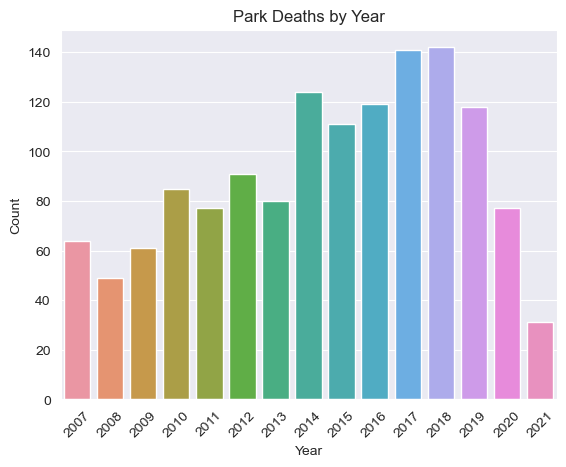

In [28]:
sns.set_style('darkgrid')  # making a bar chart to visualize the distribution 
sns.barplot(data = years, x = 'Year', y = 'Count')
plt.xticks(rotation = 45)
plt.title ('Park Deaths by Year')

In [31]:
falls = mortality_data.loc[mortality_data['Cause of Death']== "Fall"] # which park has the most falls?

In [32]:
falls

,Calendar Year,Park Name,Cause of Death,Injury Category,Sex,Age Range,Outcome
0,2007,Black Canyon of the Gunnison National Park,Fall,Unintentional,Female,15-24,Fatal injury
8,2007,Grand Canyon National Park,Fall,Unintentional,Male,Undetermined,Fatal injury
10,2007,North Cascades National Park,Fall,Unintentional,Male,25-34,Fatal injury
12,2007,Yosemite National Park,Fall,Unintentional,Female,35-44,Fatal injury
13,2007,Denali National Park & Preserve,Fall,Unintentional,Female,35-44,Fatal injury
...,...,...,...,...,...,...,...
1356,2021,Yosemite National Park,Fall,Unintentional,Male,25-34,Fatal injury
1362,2021,Sequoia National Park,Fall,Unintentional,Male,55-64,Fatal injury
1363,2021,Zion National Park,Fall,Unintentional,Female,25-34,Fatal injury
1366,2021,Mount Rainier National Park,Fall,Unintentional,Male,Undetermined,Fatal injury


In [33]:
falls['Park Name'].value_counts()   # yosemite has the most falls

Yosemite National Park                         53
Grand Canyon National Park                     37
Zion National Park                             30
Sequoia National Park                          28
Grand Teton National Park                      26
Mount Rainier National Park                    25
Denali National Park & Preserve                23
Rocky Mountain National Park                   23
Glacier National Park                          11
Great Smoky Mountains National Park             8
North Cascades National Park                    8
Yellowstone National Park                       8
Joshua Tree National Park                       7
Acadia National Park                            6
Canyonlands National Park                       5
Death Valley National Park                      5
Shenandoah National Park                        3
Olympic National Park                           3
Pinnacles National Park                         2
Big Bend National Park                          2
